### Mô Tả Bài Toán

Bạn của bạn là một đại lý bán phòng và muốn bạn giúp họ dự đoán giá phòng.Họ mong muốn rằng bạn sẽ tạo ra một mô hình cho họ để cho phép họ có thể đưa vào một vài đặc điểm của một phòng và trả về ước tính giá trị của phòng đó sẽ được bán với giá là bao nhiêu.

### Dữ liệu chứa các cột sau: <br>


<li> 'size': kích cỡ phòng  </li>
<li> 'bedroom': số phòng  </li>
<li> 'price': giá phòng  </li>


### Khai báo thư viện

In [112]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Đọc file data.csv

In [113]:
Data = pd.read_csv("data.csv")
Data.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [114]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   size     141 non-null    int64
 1   bedroom  141 non-null    int64
 2   price    141 non-null    int64
dtypes: int64(3)
memory usage: 3.4 KB


In [115]:
###Data.describe()

In [116]:
Data.columns

Index(['size', 'bedroom', 'price'], dtype='object')

## Training a Linear Regression Model

Bắt đầu đào tạo một mô hình hồi quy. Đầu tiên, ta sẽ chia dữ liệu Data thành một mảng X chứa các yếu tố cần training và một mảng y có chứa biến mục tiêu cần hướng tới. Trong trường hợp này là cột price.


In [117]:
X = Data[['size', 'bedroom']]
y = Data['price']

#### Chia dữ liệu thành tập train và tập test

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
X_train.head()

,size,bedroom
113,3031,4
16,1320,2
18,2609,4
10,1940,4
36,1239,3


## Khởi tạo Model Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [123]:
predictions = lm.predict(X_test)

In [124]:
predictions

array([334025.97248663, 234298.2158857 , 224021.03026979, 461686.71102177,
       280472.78883497, 224840.77323344, 257802.74247735, 303699.15534861,
       302872.04374977, 320806.00014608, 409260.90495251, 302022.82624538,
       465998.19223089, 336104.8044365 , 229847.65463758, 302022.82624538,
       260723.42329643, 401465.05413311, 336104.8044365 , 260723.42329643,
       303699.15534861, 350569.1284929 , 210932.76933306, 364330.68371909,
       465998.19223089, 461686.71102177, 653748.87625086, 401465.05413311,
       225258.01335045])

### Kiểm tra độ chính xác của mô hình dự đoán so với thực tế

In [125]:
lm.score(X_test,y_test)

0.6157979146001467

Ta có thể thấy rằng độ chính xác của mô hình trên là 61,58%. Mô hình có độ chính xác trung bình.

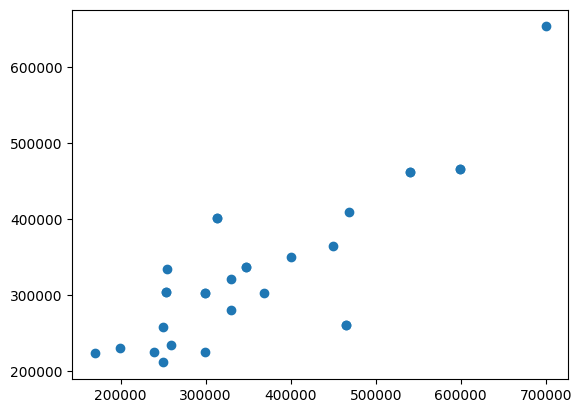

In [126]:
plt.scatter(y_test,predictions)

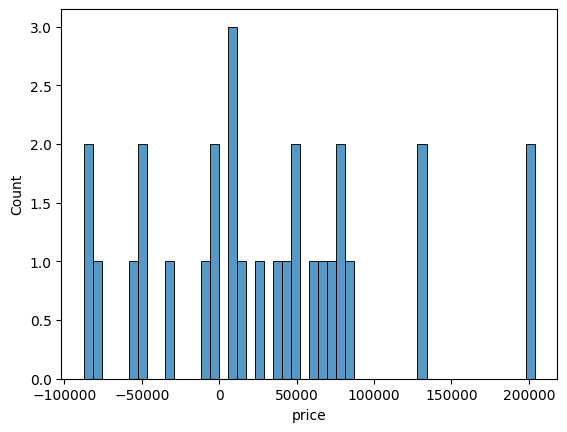

In [127]:
sns.histplot((y_test-predictions),bins=50);

In [128]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 62812.20728984615
MSE: 6609308038.071587
RMSE: 81297.65087671099
